In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DM_CA3/diabetic_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def CountMissingCol(df, col):
    return list(df[col].isnull()).count(True)

def CountMissingData(df):
    d = dict()
    for col in df.columns:
        d[col] = CountMissingCol(df, col)
    return d

In [4]:
import numpy as np
df = df.replace('?', np.nan)
df = df.replace('None', np.nan)

In [4]:
CountMissingData(df)

{'A1Cresult': 84748,
 'acarbose': 0,
 'acetohexamide': 0,
 'admission_source_id': 0,
 'admission_type_id': 0,
 'age': 0,
 'change': 0,
 'chlorpropamide': 0,
 'citoglipton': 0,
 'diabetesMed': 0,
 'diag_1': 21,
 'diag_2': 358,
 'diag_3': 1423,
 'discharge_disposition_id': 0,
 'encounter_id': 0,
 'examide': 0,
 'gender': 0,
 'glimepiride': 0,
 'glimepiride-pioglitazone': 0,
 'glipizide': 0,
 'glipizide-metformin': 0,
 'glyburide': 0,
 'glyburide-metformin': 0,
 'insulin': 0,
 'max_glu_serum': 96420,
 'medical_specialty': 49949,
 'metformin': 0,
 'metformin-pioglitazone': 0,
 'metformin-rosiglitazone': 0,
 'miglitol': 0,
 'nateglinide': 0,
 'num_lab_procedures': 0,
 'num_medications': 0,
 'num_procedures': 0,
 'number_diagnoses': 0,
 'number_emergency': 0,
 'number_inpatient': 0,
 'number_outpatient': 0,
 'patient_nbr': 0,
 'payer_code': 40256,
 'pioglitazone': 0,
 'race': 2273,
 'readmitted': 0,
 'repaglinide': 0,
 'rosiglitazone': 0,
 'time_in_hospital': 0,
 'tolazamide': 0,
 'tolbutami

In [5]:
df = df.drop(columns=['weight', 'max_glu_serum', 'A1Cresult', 'citoglipton', 'examide'], axis=1)

In [6]:
df['diag_1'] = df['diag_1'].fillna(method='ffill')
df['diag_2'] = df['diag_2'].fillna(method='ffill')
df['diag_3'] = df['diag_3'].fillna(method='ffill')
df['medical_specialty'] = df['medical_specialty'].fillna(method='ffill')
df['payer_code'] = df['payer_code'].fillna(method='bfill')
df['race'] = df['race'].fillna(method='ffill')

In [7]:
to_be_numerized = ['race', 'gender', 'age', 'payer_code', 'metformin', 'repaglinide', 'nateglinide', 'medical_specialty', 'readmitted',
                   'rosiglitazone', 'acarbose', 'acetohexamide', 'diabetesMed', 'chlorpropamide', 'change', 'diag_1',
                   'diag_2', 'diag_3', 'pioglitazone', 'tolazamide', 'tolbutamide', 'troglitazone', 'glimepiride',
                   'glipizide', 'glyburide', 'miglitol', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
                   'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']
for col in to_be_numerized:
  values = list(set(df[col]))
  df[col] = df[col].map(lambda x: values.index(x))

In [9]:
norm_df = (df-np.mean(df))/np.std(df)

100%|██████████| 11/11 [24:10<00:00, 131.90s/it]


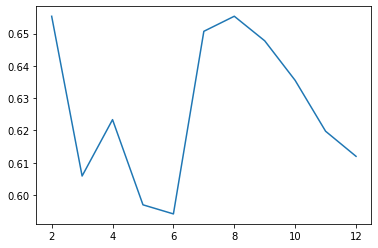

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from tqdm import tqdm
kmeans_pred = list()
kmeans_s_score = dict()
for s in tqdm(range(2,13)):
  km = KMeans(n_clusters=s)
  km.fit_predict(df.drop('encounter_id', axis=1))
  kmeans_pred.append(km.labels_)
  score = silhouette_score(df.drop('encounter_id', axis=1), km.labels_, metric='euclidean')
  kmeans_s_score[s] = score
plt.plot(list(kmeans_s_score.keys()),list(kmeans_s_score.values()))

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
clustering = DBSCAN(eps=2, min_samples=3)
clustering.fit_predict(df.drop('encounter_id', axis=1))
score = silhouette_score(df.drop('encounter_id', axis=1), clustering.labels_, metric='euclidean')

ValueError: ignored

In [14]:
results = pd.DataFrame()
results['encounter_id'] = df['encounter_id']
results['kmeans'] = kmeans_pred[0]

In [21]:
results.to_csv('/content/drive/MyDrive/DM_CA3/results_810100386.csv')